## Intro to random variable, stochastic process and simulation.

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

#First let's load the main scientific and plotting libraries we will need 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy as sp

#
from numpy.random import normal
from numpy.random import choice 

from scipy.stats import binom 
from scipy.stats import norm
from scipy.stats import poisson 

In /Users/potoyan/.matplotlib/stylelib/paper.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/potoyan/.matplotlib/stylelib/paper2.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.


### Random numbers, prob distribution and infernece libraries.

- The [**numpy.random**](https://docs.scipy.org/doc/numpy-1.15.1/reference/routines.random.html) has the fastest random number generators that are based on low level code written in C. <br>
- The [**Scipy.stats**](https://docs.scipy.org/doc/scipy/reference/stats.html ) has an extensive library of statistical distributions and tools for statistical analysis. <br> 
- The [**Statsmodels**](https://www.statsmodels.org/stable/ ) Enhancing Scipy functionality with more tools for stat snslysis 
- The [**Seaborn**](https://docs.pymc.io/) library that enhanced matplotlib functionality for easy stat visualization.  
<br>
- [**PyMC3**](https://docs.pymc.io/) and [**PyStan**](https://pystan.readthedocs.io/en/latest/#) powerhouse libaries for Probabilistic modeling, MCMC and Bayesian inference. 
- Also check out [**Sampyl**](http://mcleonard.github.io/sampyl/).
<br>

### General overview of random numbers in python 

First we take a look at most widely used random numbers of numpy also called standard random numbers. These are rand (uniform random number on interval 0,1) and randn (stnadard normal random number with 0 mean and 1 variance). Useful Tip: when writing any code withr andom numbers is pay attention to the seed. If you want to test your code use the same seed to check for reproducability. 

In [2]:
#np.random.seed(83743) 
np.random.rand(3,4) # Generates random numbers of shape X,Y via unifrom distirbution in interval [0,1)

array([[0.93317431, 0.54357834, 0.89805792, 0.63323201],
       [0.48382994, 0.6699008 , 0.85469476, 0.68085066],
       [0.7386408 , 0.23136214, 0.86394023, 0.13674658]])

In [3]:
#np.random.seed(18493) 
np.random.randn(3,4) # Generates random numbers of shape X,Y via N(0,1) univariate normal distribution

array([[-0.39378257,  0.54359105,  1.32360656, -0.35824985],
       [-1.23358173,  0.43301686,  0.60112844, -0.3414434 ],
       [ 0.31041067,  1.2990629 , -1.26109649, -1.02106804]])

Parametraized random number allow you to set parameters like value of mean and interval length and therefore can be viewed as generalized versions of standard random numbers. Below we take a look at examples of continuous (random and unofrm RVs) and discrete random numbers generated by paratmerized distributions. 

In [4]:
np.random.uniform(low=-1, high=1, size=(3, 4))

array([[ 0.97186743, -0.6135395 ,  0.32598516, -0.32772057],
       [-0.28551852,  0.63225622, -0.04436683, -0.66051903],
       [ 0.02937552,  0.9102688 , -0.4438706 ,  0.47549664]])

In [5]:
np.random.normal(loc=8, scale=10, size=(3, 4))

array([[ 6.59451276,  8.01236083, 20.51556024,  0.45017129],
       [ 0.55052913, -9.32681538,  3.59191245, 13.31556323],
       [11.44381875, -8.70772085,  4.07994943,  9.04466917]])

In [6]:
np.random.binomial(n=10, p=0.6, size=20) # This one is Binomial distributions. You can see it is discrete as  exepcted. 

array([7, 4, 3, 4, 6, 7, 6, 6, 5, 4, 6, 4, 8, 9, 7, 6, 5, 4, 5, 5])

### Using random numbers to get answers via simulations 

One of the major uses of random numbers is for conducting numerical simulations. What is a simulation? It is a recreation of a process on a computer. And this recreation is done by random numbers. E.g to simulate coint tosses, die throws, diffusion of molecules, conformational change of polymers we use random number to recreate the process on a computer. Let's start off by asking some simple questions

(i) How often do we get a run of 5 or more consecutive heads in 100 coin tosses if we repeat the experiment 1000 times?
<br>
(ii) What if the coin is biased to generate heads only 40% of the time?

In [7]:
Ntraj = 1000      # number of experiments: stochastic trajecotries generated
traj_length = 100 # length of each trajectory

xs = np.random.choice([0,1], (Ntraj, traj_length)) # (i) Unbiased coint p=[0.5,0.5] by default

ys = np.random.choice([0,1], (Ntraj, traj_length), p=[0.6, 0.4])  # (ii) biased coin

In [8]:
np.random.seed(12738)
# Non-fancy way of simulating the answer
runs = 0
for x in xs:    # plug either xs or ys
    m = 0
    for i in x:
        if i == 1:
            m += 1
            if m >=5:
                runs += 1
                break
        else:
            m = 0
runs

825

### Simple, discrete, unbiased random walk in 1D.

 Let's start off by simulating a random walk outlined in class by using a random number generators from numpy called choice and normal. Type help(np.random.choice) and help(np.random.normal) to learn more. 

* The <em>numpy.random.choice(A,size=(M,N,K))</em> returns element from a list of objects, A with uniform and equal probabilities (default, customizable for unequal probabilities)  in the form of 1D, 2D or 3D arays of length M,N,K. 

In [9]:
choice(['bagel','muffin','croissant'],size=(3,5))

array([['bagel', 'croissant', 'muffin', 'muffin', 'croissant'],
       ['muffin', 'croissant', 'bagel', 'croissant', 'bagel'],
       ['croissant', 'croissant', 'muffin', 'croissant', 'bagel']],
      dtype='<U9')

* The <em>numpy.random.normal(mu,sigma,size=(M,N,K))</em> retruns random number distributed according to gausian probability function in the form of 1D, 2D or 3D arays of length N,M,K 

In [10]:
# Here we generate 3 sequences of normally distributed random variables of length 5
normal(0,2,(3,5))

array([[-2.69161384, -1.76025845,  2.6359338 , -1.27629114,  0.28905087],
       [ 1.10431222, -2.35128534,  1.62603244, -0.08737834,  0.95731216],
       [-0.47182587, -0.10790324,  0.85141111,  0.9185157 , -0.58355616]])

Armed with basic knowedge of python and random number generators we can built models of random walk: both dsicrete and continuus. 

### 1D unbiased random walk model

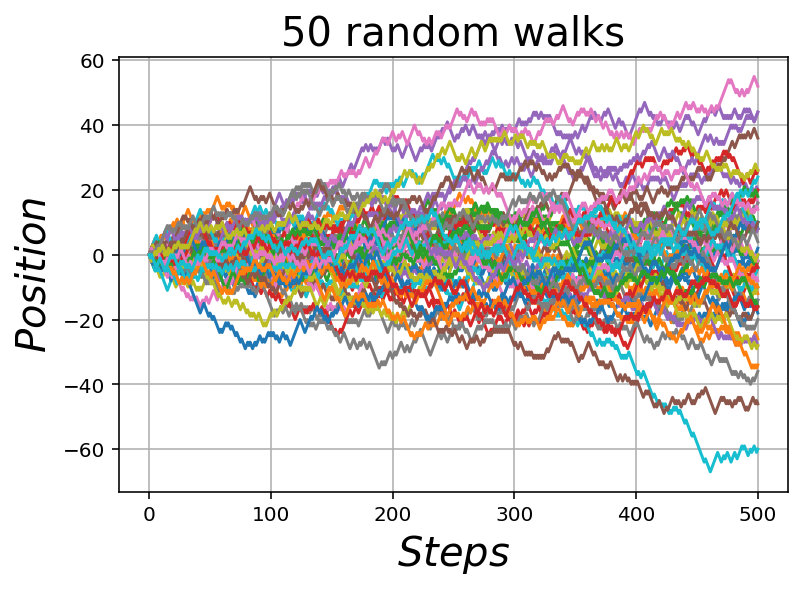

In [91]:
L = 500 # number of steps in a random walk
N = 50  # number of independent random walkers

# i. Create N by L matrix filled with {+1,-1} numbers. 
walk = choice([-1,1], size=(L, N)) 

# ii. Compute cumulative sum: make each element of array the sum of the previous ones: 
rw_sum = walk.cumsum(axis=0)

#iii. Specify initital condition. E.g make all walkers start from zero origin
rw_sum[0,:]=0                    #rw_sum = np.r_[np.zeros((1,N)), rw_sum] # what does this do? 
    
plt.plot(rw_sum)

plt.title(f'{N} random walks', fontsize=20)
plt.xlabel(r'$Steps$',fontsize=20)
plt.ylabel(r'$Position$',fontsize=20)
plt.grid(True)

In [38]:
#rows acessed via first index and correspond to individual trajectories
print(rw_sum[0,:].shape)
print(rw_sum[0,:])

(50,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [40]:
# jth column acessed viasecond index corresponds to jth positions of awalker
print(rw_sum[:,0].shape)
#print(rw_sum[:,0])

(500,)


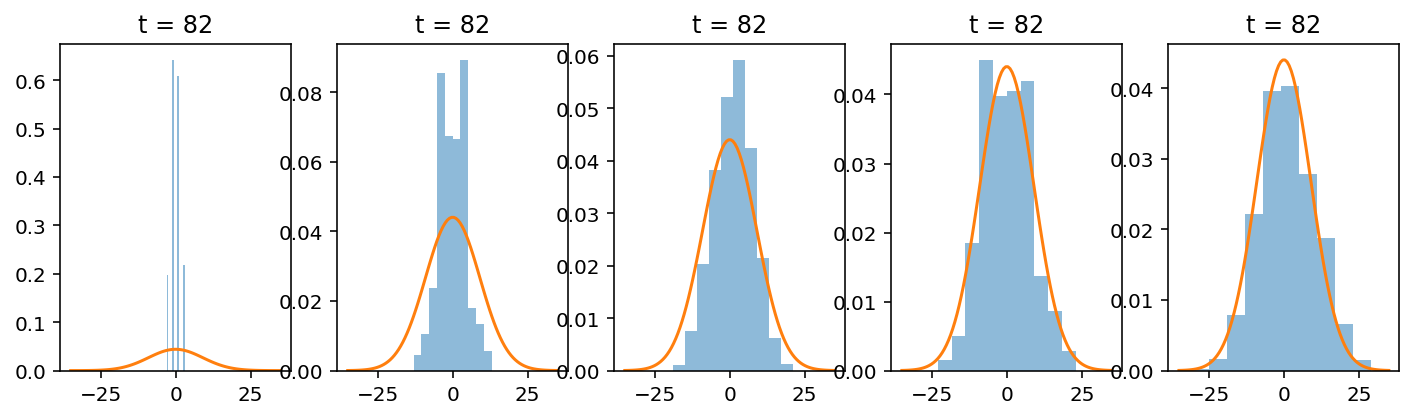

In [98]:
L, N = 100, 1000

rw_sum = choice([-1,1], size=(L, N)).cumsum(axis=0)

rw_sum[0,:]=0

fig, axes = plt.subplots(1, 5, figsize=(12, 3), sharex=True) # Show 5 snapshots along the N length trajectory

for i, t in enumerate(np.arange(2, L, int(L/5))):   
    
    axes[i].hist(rw_sum[t,:], alpha=0.5, density=True)  # generate histogram at different points
    
    xp = np.linspace(-35, 35, L)    # generate normal pdf with given mu and sigma
    
    gauss_xp = norm(loc=0, scale=np.sqrt(k)).pdf(xp) 
    
    axes[i].plot(xp, gauss_xp)  
    
    axes[i].set_title('t = %d' % k)

Text(0, 0.5, '$MSD(n)=\\langle x(n)^2 \\rangle$')

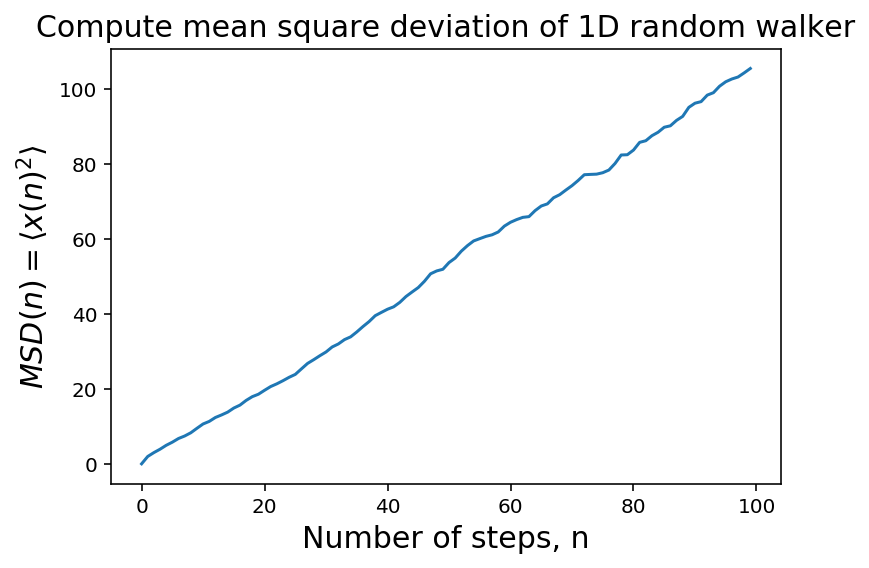

In [100]:

# Determine the time evolution of the mean square distance.
plt.plot(np.mean(rw_sum**2,axis=1)) # why only rw**2 and not mean(rw-mean(rw))**2 ? 

plt.title('Compute mean square deviation of 1D random walker',fontsize=15)
plt.xlabel('Number of steps, n',fontsize=15)
plt.ylabel(r'$MSD(n)=\langle x(n)^2 \rangle$',fontsize=15)

### Animate discrete random walk in 3D.

<IPython.core.display.Javascript object>


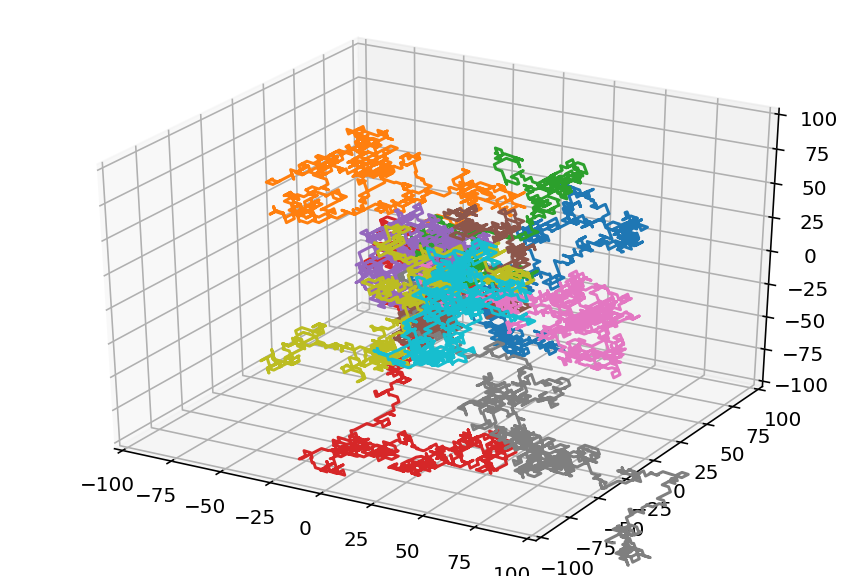

In [102]:
%matplotlib notebook
%matplotlib notebook

# Fixing random state for reproducibility
#np.random.seed(19680801)

import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation

def path_generator(steps, step):
    path = np.zeros((3, steps))                  # initiate random walker from 0,0,0
    for i in range(1, steps):
        x_ran, y_ran, z_ran = np.random.rand(3)  # Generate three uniform rand numbers 0-1
        
        sgnX =  2*(x_ran - 0.5)/abs(x_ran - 0.5)    # turn them into -1 and 1 steps
        sgnY =  2*(y_ran - 0.5)/abs(y_ran - 0.5)
        sgnZ =  2*(z_ran - 0.5)/abs(z_ran - 0.5)
        
        dis = np.array([step*sgnX, step*sgnY, step*sgnZ])  # Compute displacement
        path[:, i] = path[:, i - 1] + dis        # Propagate path of random walker from i-1 to i step

    return path

def animate(i):
    global particles, trajectories
    for trajectory, particle in zip(trajectories, particles):
        trajectory.set_data(particle[0:2, :i])
        trajectory.set_3d_properties(particle[2, :i])  

def random_walk_3D_animated(n, traj = 1):
    global particles, trajectories
    fig = plt.figure()
    ax = p3.Axes3D(fig)

    particles = [path_generator(n, 1) for i in range(traj)]
    trajectories = [ax.plot(particle[0, 0:1], particle[1, 0:1], particle[2, 
                    0:1])[0] for particle in particles]
    ax.set_xlim3d([-100, 100])
    ax.set_ylim3d([-100, 100])
    ax.set_zlim3d([-100, 100])

    animacion = animation.FuncAnimation(fig, animate, 10000, interval=10, 
                                        blit=False)
    return animacion

ani = random_walk_3D_animated(10000, traj = 10)

In [57]:
# Questions: 
# (i) Compute MSD for 3D random walk show the expected scaling 
# (ii) Generate random walks from different positions
# (iii) 

In [19]:
# Run this to get back to inline plotting. 
%matplotlib inline

### Binomial distribution of a random walker
Previous example we started with random variables with no reference to probability distribution. This time we will generate random numbers from binomial distribution since we know that random walk is governed by binomial distirbution. We can use either scipy.stats library or numpy.random library. 

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'$P(X_N)$')

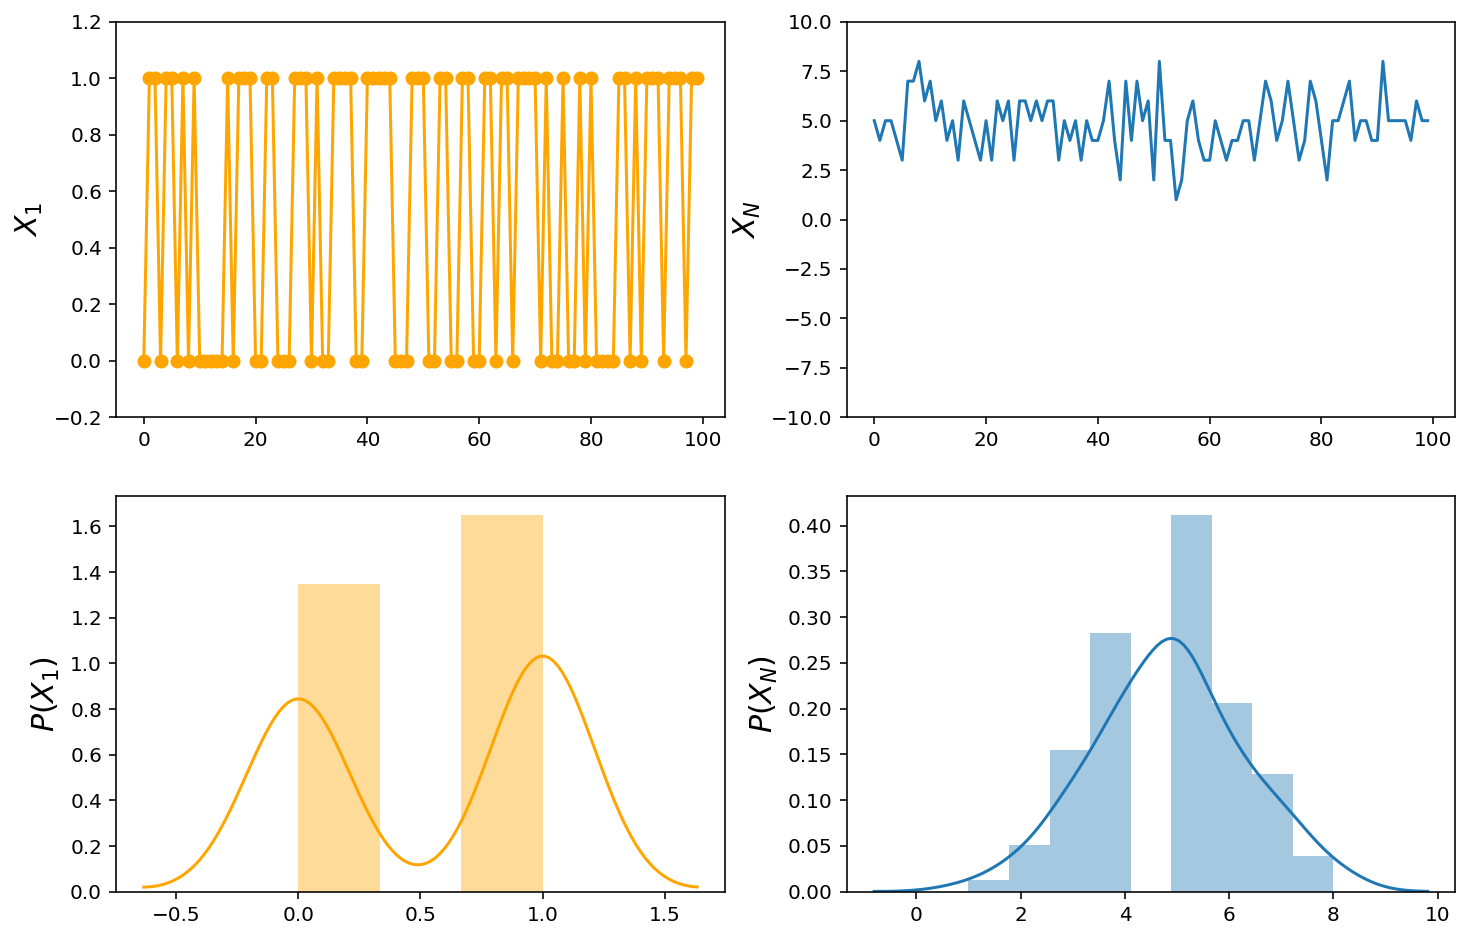

In [12]:
Nexp=1000  # number of experiments,
N=10      # number of coin tosses in each experiment
q = 0.5   # probability of each trial 

# Compute X1 and XN
s=binom.rvs(1,q,size=Nexp)    # Define random variable s: coin flip 1 time. Repeat experiment Nexp times 
#s = np.random.binomial(1, q, Nexp)   #Doing same using numpy

XN=binom.rvs(N,q,size=Nexp)  # Define random variable XN: coin flip N times. Repeat Nexp. 
#s = np.random.binomial(1, q, Nexp) #Doing same using numpy

###Plotting###
fig,ax=plt.subplots(nrows=2, ncols=2,figsize=(12,8))
ax[0,0].plot(s,'-o',color='orange')
ax[0,1].plot(XN)
#
ax[0,0].set_ylabel(r'$X_1$',fontsize=15)
ax[0,1].set_ylabel(r'$X_N$',fontsize=15)
ax[0,0].set_ylim([-0.2,1.2])
ax[0,1].set_ylim([-N,N])
#
sns.distplot(s,ax=ax[1,0], color='orange')
sns.distplot(XN,ax=ax[1,1])
ax[1,0].set_ylabel(r'$P(X_1)$',fontsize=15)
ax[1,1].set_ylabel(r'$P(X_N)$',fontsize=15)

In [223]:
s =  binom(10, 0.5) # Declare X to be a binomial random variable

# Knowing probability distribution of X we can get all kinds of properties such as:
print(s.rvs(20))          # 10 random samples form X
print(s.pmf(5))           # P(X = 3)
print(s.cdf(4))           # P(X <= 4)
print(s.mean())           # E[X], mean
print(s.var())            # Var(X), variance
print(s.std())            # Std(X), standard deviation

[6 4 6 4 5 4 4 6 6 5 4 3 5 4 6 7 0 4 3 1]
0.24609375000000025
0.3769531250000001
5.0
2.5
1.5811388300841898


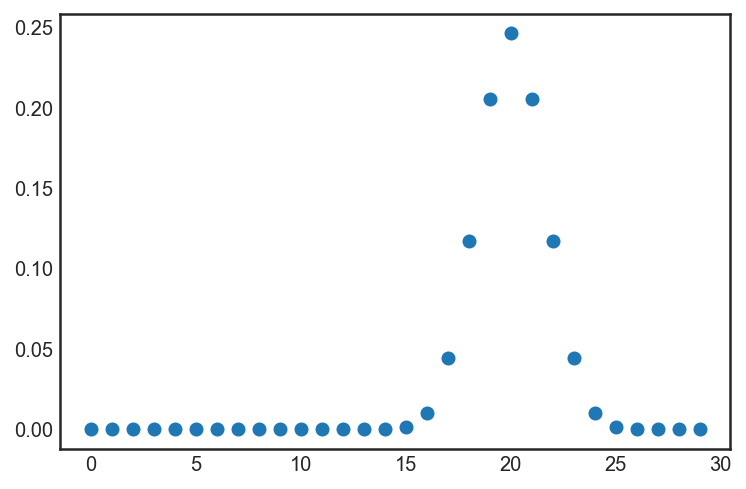

In [244]:
# plot PMF 
plt.plot(s.pmf(np.arange(-15,15,1)),'o')

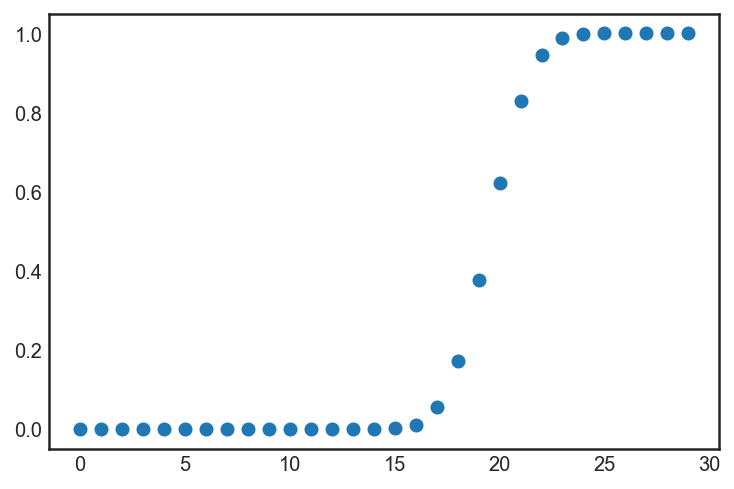

In [245]:
# plot CdF 
plt.plot(s.cdf(np.arange(-15,15,1)),'o')

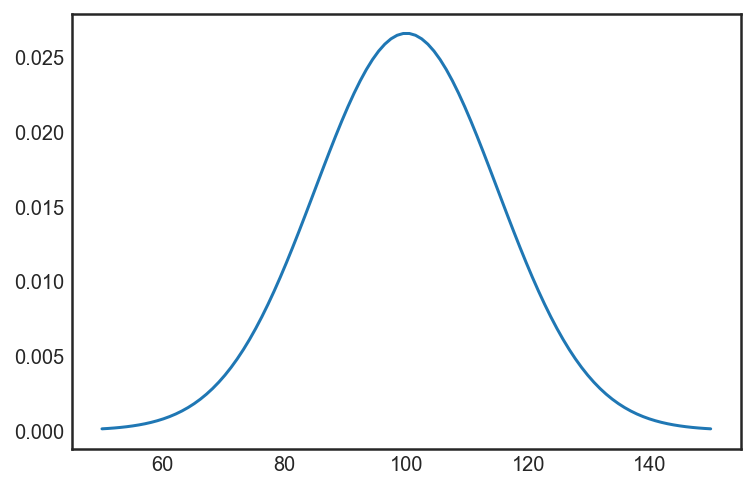

In [219]:
# plot PDF 
dist = norm(loc=100, scale=15)
xs = np.linspace(50, 150, 100)
plt.plot(xs, dist.pdf(xs))

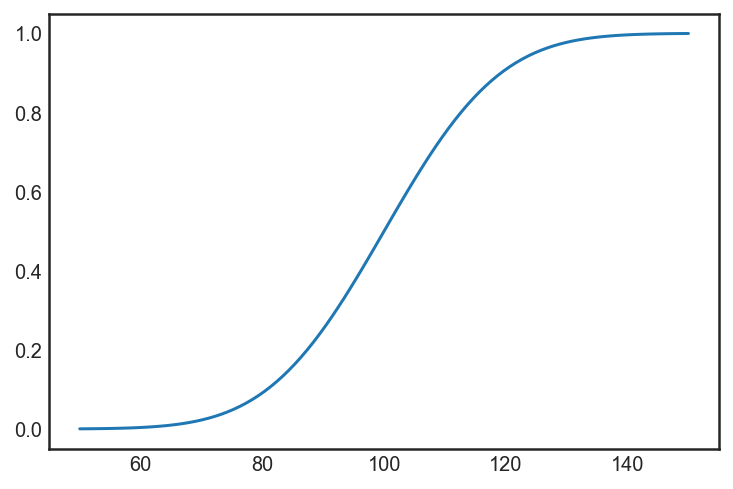

In [220]:
# Plot CDF
plt.plot(xs, dist.cdf(xs))
pass

### Continuous time random walk: Brownian motion

We have learned about random variables, random walk and have encorunetred a concept of stochastic process on the example of discrete step 1D random walk. Now let us generate the prototypical stochasic process in continuous time; the brownian motion. Brownian motion was first discoverd by a botanist Brown who noticed that a pollen in solution undergo erratic and incessant motion. To simulate brownian motion we take the continuous time limit of random walk and approximate dsiplacements of our particle as normally distributed (binomial->normal, time step->continuous time)
$$x(t+dt)-x(t)=N(0,\sqrt{2D dt})$$ 
We assume we have started at position $\mu=0$ and our variance is given by $\sigma^2=2Dt$ Where D is the diffusion coefficnets which is related to parameters of discree random walk as shown in the lecture.  
$$x(t+dt)=x(t)+\sqrt{2D dt} \cdot N(0,1)$$ 
In the last step we re-wrote brownian motion equation in a convenient way by shifting normally distributed radnom variable by $\mu$ and scaling it by $\sigma$ $N(\mu, \sigma^2)=\mu+\sigma N(0,1)$. 

CPU times: user 20.2 ms, sys: 3.87 ms, total: 24.1 ms
Wall time: 22.7 ms


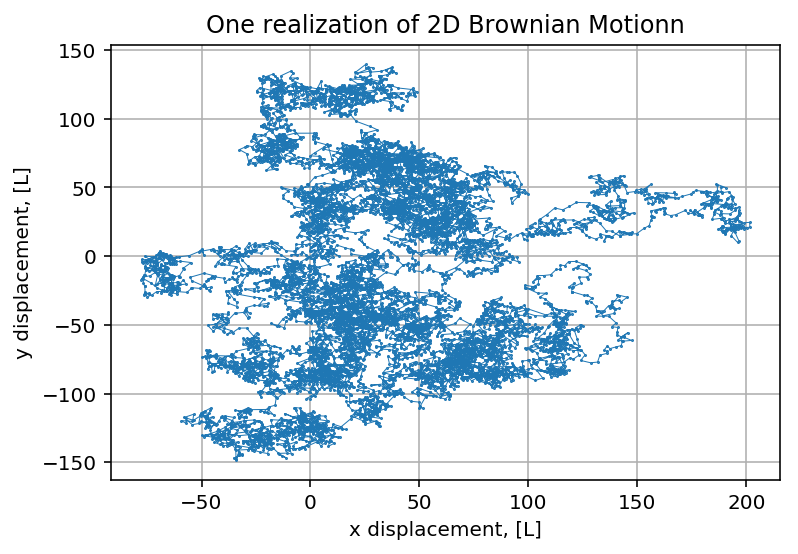

In [3]:
%%time
def brown2D(nT,D=3.0,dt=1.0):
    """ Generating Brownian displacements in 2 dimensions
    ----------
    nT:   number of time measurmenets
    Returns: displacements in x and y
    ------- """
    
    C = np.sqrt(2*D*dt)                    
    normDisX = C*normal(0, 1, nT)       #Draw random numbers normal distribution using numpy.random.normal
    normDisY = C*normal(0, 1, nT)
    
    return np.cumsum(normDisX), np.cumsum(normDisY) # Sum up displacements over time

# Try changing length of time and see what happens
nT=10000
xDis, yDis = brown2D(nT)

fig,ax=plt.subplots(figsize=(6,4))
ax.plot(xDis, yDis,'-o',linewidth=0.5,ms=0.5)
ax.grid(True)
ax.set_title("One realization of 2D Brownian Motionn")
ax.set_xlabel("x displacement, [L]")
ax.set_ylabel("y displacement, [L]")

One way we can verify that a stochstic process is brownian is by computing the distribution of displacments $\Delta x(dt, t_i)=x(t_i+dt)-x(t_i)$, for $i=1...N$ measrument intervals and showing it to be gaussian:

Text(0, 0.5, 'dy')

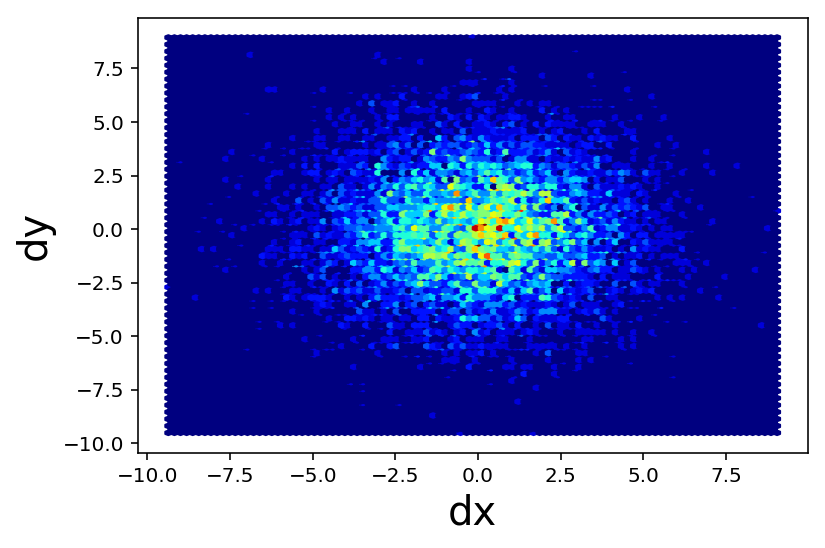

In [11]:
dx=np.ediff1d(xDis)  #We can also get dx and dy manually, e.g xDis[1::2]-xDis[0::2]
dy=np.ediff1d(yDis)
#
plt.hexbin(dx,dy,bins=50,cmap='jet')
plt.xlabel('dx',fontsize=20)
plt.ylabel('dy',fontsize=20)

<IPython.core.display.Javascript object>


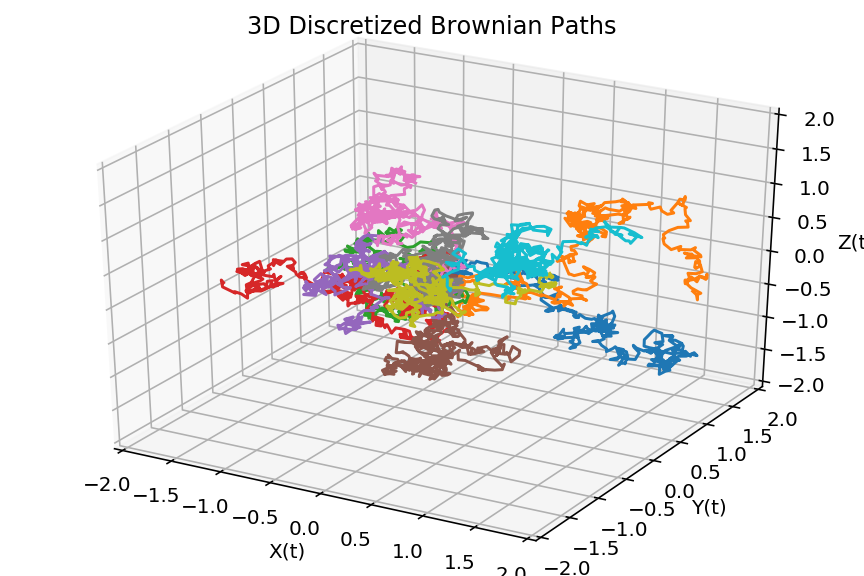

In [21]:
#np.random.seed(12335)

%matplotlib notebook
%matplotlib notebook

def generateBrownianPath(dt, N):
    """
    Create a brownian path using normal random numbers.
    """
    
    dX = np.sqrt(dt) * np.random.randn(1, N)
    X = np.cumsum(dX, axis=1)
    
    dY = np.sqrt(dt) * np.random.randn(1, N)
    Y = np.cumsum(dY, axis=1)
    
    dZ = np.sqrt(dt) * np.random.randn(1, N)
    Z = np.cumsum(dZ, axis=1)
    
    Brown_path = np.vstack((X, Y, Z))
    
    return Brown_path


def updateLines(num, dataLines, lines):
    for u, v in zip(lines, dataLines):
        
            u.set_data(v[0:2, :num])
            u.set_3d_properties(v[2, :num])

    return lines

# Simulation properties
N = 501
T = 1.0
dt = T/(N-1)
numPaths = 10

# Create a list of NumPy array sized = numLines*3*N

data = [generateBrownianPath(dt, N) for index in range(numPaths)]

fig = plt.figure()
ax = p3.Axes3D(fig)
ax.set_xlim3d([-2.0, 2.0])
ax.set_xlabel('X(t)')

ax.set_ylim3d([-2.0, 2.0])
ax.set_ylabel('Y(t)')

ax.set_zlim3d([-2.0, 2.0])
ax.set_zlabel('Z(t)')
    
ax.set_title('3D Discretized Brownian Paths')
    
# Create a list of line3D objects
lines = [ax.plot(dat[0, 0:1], dat[1, 0:1], dat[2, 0:1])[0] for dat in data]


# Create the animation object
anim = animation.FuncAnimation(fig, updateLines, N+1, fargs=(data, lines),
                                   interval=30, repeat=True, blit=False)

#plt.tight_layout()
plt.show()

In [23]:
# again run this to get back to inline plotting
%matplotlib inline

### Using random numbers for evaluating integrals: Monte Carlo. 

#### Example-1 of using Monte Carlo, estimation of pi

The idea behind the program is that the ratio of the area of the unit circle to the square that inscribes it is $\pi/4$, so by counting the fraction of the random points in the square that are inside the circle, we get increasingly good estimates to $\pi$.

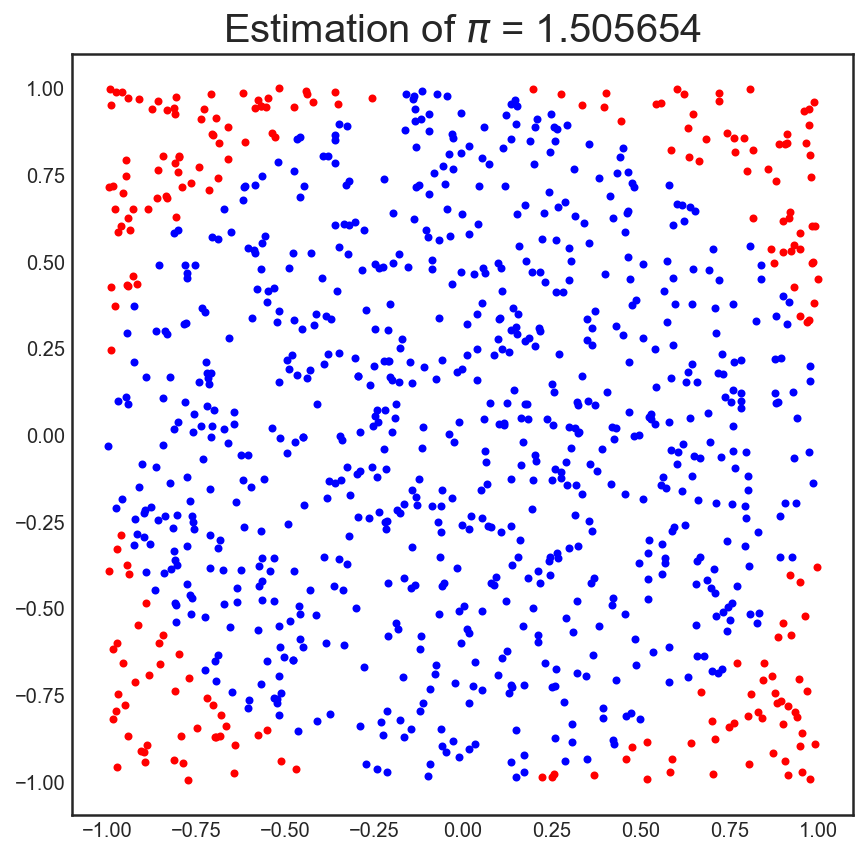

In [147]:
npts = 1000
xs = 2*np.random.rand(npts)-1
ys = 2*np.random.rand(npts)-1
r = xs**2+ys**2

ninside = np.sum(r[r<1]) # sum over those values stasifying r<1

fig,ax=plt.subplots(figsize=(7,7))
ax.set_title("Estimation of $\pi$ = %f" % (4*ninside/float(npts)),fontsize=20)
ax.plot(xs[r<1],ys[r<1],'b.')
ax.plot(xs[r>1],ys[r>1],'r.')

To be fair as methods of computing $\pi$ go, this is not the best method. A much better method is to use Leibniz's expansion of arctan(1):

$$\frac{\pi}{4} = \sum_k \frac{(-1)^k}{2*k+1}$$

In [170]:
kmax = 1000 # 
total = 0
for k in range(kmax):
    total += pow(-1,k)/(2*k+1.0)
print(4*total)

3.140592653839794


#### Basic Idea behind Monte Carlo

The basic idea of Monte Carlo integration is very simple and only requires elementary statistics. Suppose we want to find the value of the following integral in some region with volume $V$: $$I = \int_a^b f(x) dx $$

Monte Carlo integration estimates this integral by estimating the fraction of random points that fall below $f(x)$  multiplied by $V$. In other words we are follwing the same procedure as for evaluating pi but this time our area is the area under some general function instead of a circule inscribed in square. Using probability language, Monte Carlo simulation tallows us to obtain an estimate of the expectation $$
E[g(X)] = \int g(x) p(x) dx
$$

with

$$
\bar{g_n} = \frac{1}{n} \sum_{i=1}^n g(x_i)
$$
where points $x_i \sim p$ are draw from the probability density $p$.

We can estimate the Monte Carlo variance of the approximation as $$
\sigma^2_n = \frac{1}{n^2} \sum_{i=1}^n (g(x_i) - \bar{g_n})^2)
$$

Also, according to Central Limit Theorem, expectation of sum of random variables scaled by standard deviaton tends to normal distribution:

$$
\frac{\bar{g_n} - E[g(X)]}{\sigma_n} \sim \mathcal{N}(0, 1)
$$
Therefore the convergence of Monte Carlo integration is $\mathcal{0}(n^{1/2})$ and independent of the dimensionality. Hence Monte Carlo integration generally beats numerical integration for moderate- and high-dimensional integration since numerical integration (quadrature) converges as $\mathcal{0}(n^{d})$. Even for low dimensional problems, Monte Carlo integration may have an advantage when the volume to be integrated is concentrated in a very small region and we can use information from the distribution to draw samples more often in the region of importance.

Okay back to evaluating integrals. We want to have an efficient way of finding integrals like this:

$$I = \int{f(x)} \, dx$$
Consider the expectation of a function $g(x)$ with respect to some distribution $p(x)$. By definition, we have

$$
E[g(x)] = \int{g(x) \, p(x) \, dx}
$$
If we choose $g(x) = f(x)/p(x)$, then we have

$$
\begin{align}
E[g(x)] &= \int{\frac{f(x)}{p(x)} \, p(x) \, dx} \\
&= \int{f(x) dx} \\
&= I
\end{align}
$$
By the law of large numbers, the average converges on the expectation, so we have

$$
I \approx \bar{g_n} = \frac{1}{n} \sum_{i=1}^n g(x_i)
$$
Where random points $x_i$ are generated from the distribution $p(x)$. If $f(x)$ is a proper integral (i.e. bounded), and $p(x)$ is the uniform distribution on $[0,1]$, then $g(x) = f(x)$ and this is known as ordinary Monte Carlo. If the integral of $f(x)$ is improper, then we need to use another distribution with the same support as $f(x)$.

#### Example-2 of using Monte Carlo: evaluation of a definite integral

We want to estimate the following integral $I=\int_0^1 e^x dx$.

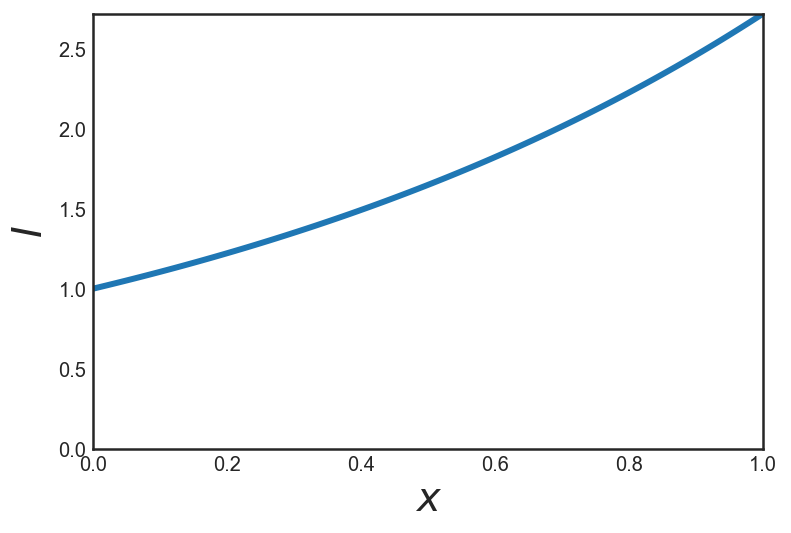

In [178]:
x = np.linspace(0, 1, 100)
plt.plot(x, np.exp(x),linewidth=3.0)
plt.xlim([0,1])
plt.ylim([0, np.exp(1)])
plt.xlabel('$x$',fontsize=20)
plt.ylabel('$I$',fontsize=20)
pass

We can evaluate via quadrature as told in calculus:

In [182]:
from scipy import integrate

y, err = integrate.quad(np.exp, 0, 1)
y,err 

(1.7182818284590453, 1.9076760487502457e-14)

In [184]:
for n in 10**np.array([1,2,3,4,5,6,7,8]):
    x = np.random.uniform(0, 1, n)
    gn = np.mean(np.exp(x))
    print('%10d %.6f' % (n, gn))

        10 1.798316
       100 1.677577
      1000 1.745702
     10000 1.721623
    100000 1.720199
   1000000 1.718739
  10000000 1.718262
 100000000 1.718313


#### Intuition for error rate: Why Monte Carlo can beat brute force integration.
We will just work this out for a proper integral $f(x)$ defined in the unit cube and bounded by $|f(x)| \le 1$. Draw a random uniform vector $x$ in the unit cube. Then

$$
\begin{align}
E[f(x)] &= \int{f(x) p(x) dx} = I \\
\text{Var}[f(x)] &= \int{(f(x) - I )^2 p(x) \, dx} \\
&= \int{f(x)^2 \, p(x) \, dx} - 2I \int f(x) \, p(x) \, dx + I^2 \int{p(x) \, dx} \\
&= \int{f(x)^2 \, p(x) \, dx}  + I^2 \\
& \le \int{f(x)^2 \, p(x) \, dx} \\
& \le \int{p(x) \, dx} = 1
\end{align}
$$
Now consider summing over many such IID (independent identically distributed) points: $S_n = f(x_1) + f(x_2) + ... + f(x_n)$. We have

$$
\begin{align}
E[S_n] &= nI \\
\text{Var}[S_n] & \le n
\end{align}
$$
and as expected, we see that $I \approx S_n/n$. One can proof a Chebyshev's inequality which shows how variance of sum scales with number of samples:

$$
\begin{align}
P \left( \left| \frac{s_n}{n} - I \right| \ge \epsilon \right)  &= 
P \left( \left| s_n - nI \right| \ge n \epsilon \right) & \le \frac{\text{Var}[s_n]}{n^2 \epsilon^2} & \le
\frac{1}{n \epsilon^2} = \delta
\end{align}
$$
Suppose we want 1% accuracy and 99% confidence - i.e. set $\epsilon = \delta = 0.01$. The above inequality tells us that we can achieve this with just $n = 1/(\delta \epsilon^2) = 1,000,000$ samples, regardless of the data dimensionality.

#### Example-3 of using Monte Carlo: monitoring the convergence (decresase of variance)

We are often interested in knowing how many iterations it takes for Monte Carlo integration to "converge". To do this, we would like some estimate of the variance, and it is useful to inspect such plots. One simple way to get confidence intervals for the plot of Monte Carlo estimate against number of iterations is simply to do many such simulations.

For the example, we will try to estimate the function (again)

$$
f(x) = x \cos 71 x + \sin 13x, \ \  0 \le x \le 1
$$

In [44]:
def f(x):
    return x * np.cos(71*x) + np.sin(13*x)
x = np.linspace(0, 1, 100)
plt.plot(x, f(x),linewidth=2.0)
plt.xlabel(r'$x$',fontsize=20)
plt.ylabel(r'$f(x)$',fontsize=20)
pass

When we do a single run of MC we use one long sequence of unform random numbers

In [45]:
# sequence of n uniform random numbers
n = 100 
x = f(np.random.random(n))
y = 1.0/n * np.sum(x)
y

0.10970175709093233

We vary the sample size from 1 to 100 and calculate the value of $y = \sum{x}/n$ for 1000 replicates. We then plot the 2.5th and 97.5th percentile of the 1000 values of $y$ to see how the variation in $y$ changes with sample size. The blue lines indicate the 2.5th and 97.5th percentiles, and the red line a sample path.

In [46]:
n = 100
reps = 1000

x = f(np.random.random((n, reps)))
y = 1/np.arange(1, n+1)[:, None] * np.cumsum(x, axis=0)

upper, lower = np.percentile(y, [2.5, 97.5], axis=1)

Text(0.5, 0, 'Number of independent MC runs')

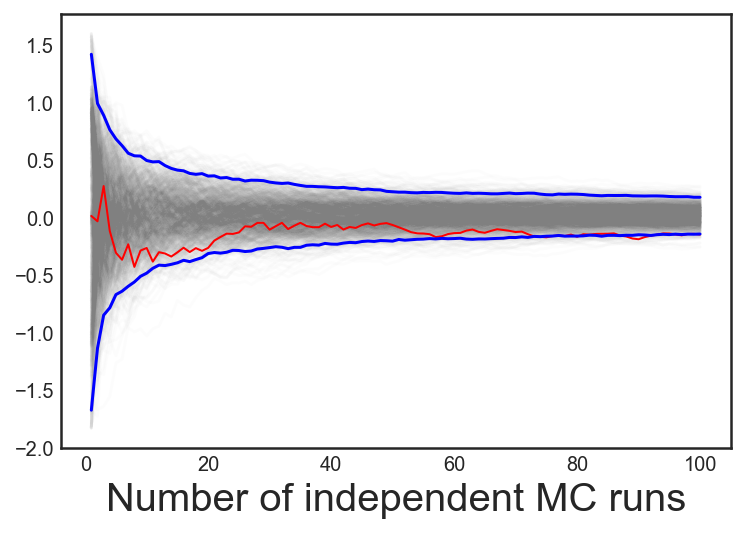

In [50]:
%matplotlib inline

plt.plot(np.arange(1, n+1), y, c='grey', alpha=0.02)
plt.plot(np.arange(1, n+1), y[:, 0], c='red', linewidth=1);
plt.plot(np.arange(1, n+1), upper, 'b', np.arange(1, n+1), lower, 'b')
plt.xlabel('Number of independent MC runs',fontsize=20)

#### On variance Reduction
With independent samples, the variance of the Monte Carlo estimate is

$$\begin{align}
\text{Var}[\bar{g_n}] &= \text{Var} \left[ \frac{1}{N}\sum_{i=1}^{N} \frac{f(x_i)}{p(x_i)} \right] \\
&= \frac{1}{N^2} \sum_{i=1}^{N}  \text{Var} \left[ \frac{f(x_i)}{p(x_i)} \right] \\
&= \frac{1}{N^2} \sum_{i=1}^{N} \text{Var}[Y_i] \\
&= \frac{1}{N} \text{Var}[Y_i]
\end{align}$$

where $Y_i = f(x_i)/p(x_i)$. In general, we want to make $\text{Var}[\bar{g_n}]$ as small as possible for the same number of samples. There are several variance reduction techniques (also colorfully known as Monte Carlo swindles) that have been described - we will illustrate one such powerful tecnique called the importance sampling technique.

#### Importance sampling

Suppose we want to evaluate

$$
I = \int{h(x)\,p(x) \, dx}
$$
where $h(x)$ is some function and $p(x)$ is the PDF of $x$. If it is hard to sample directly from $p$, we can introduce a new density function  $q(x)$ that is easy to sample from, and write

$$
I = \int{h(x)\, p(x)\, dx} = \int{h(x)\, \frac{p(x)}{q(x)} \, q(x) \, dx}
$$
In other words, we sample from $h(y)$ where $y \sim q$ and weight it by the likelihood ratio $\frac{p(y)}{q(y)}$, estimating the integral as

$$
I \approx \frac{1}{n}\sum_{i=1}^n \frac{p(y_i)}{q(y_i)} h(y_i)
$$
Sometimes, even if we can sample from $p$ directly, it is more efficient to use another distribution.

Example
Suppose we want to estimate the tail probability of $\mathcal{N}(0, 1)$ for $P(X \gt 5)$. Regular MC integration using samples from $\mathcal{N}(0, 1)$ is hopeless since nearly all samples will be rejected. However, we can use the exponential density truncated at 5 as the importance function and use importance sampling. Note that $h$ here is simply the identify function.

#### Example of importance sampling

Suppose we want to estimate the tail probability of $\mathcal{N}(0, 1)$ for $P(X \gt 5)$. Regular MC integration using samples from $\mathcal{N}(0, 1)$ is hopeless since nearly all samples will be rejected. However, we can use the exponential density truncated at 5 as the importance function and use importance sampling. Note that $h$ here is simply the identify function.

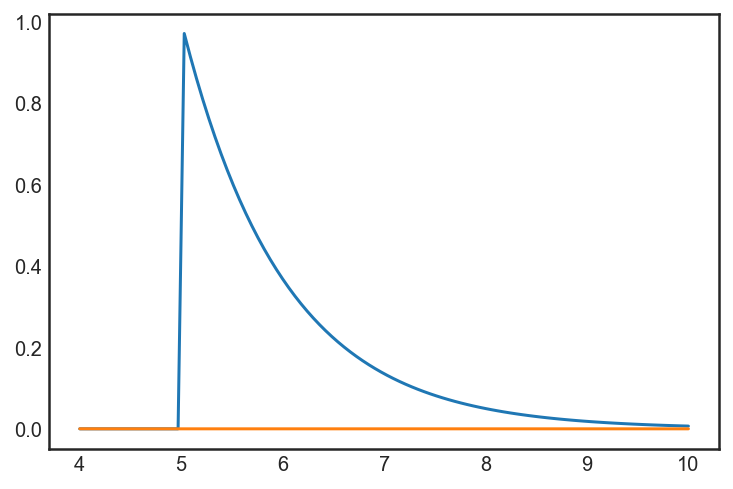

In [201]:
x = np.linspace(4, 10, 100)
plt.plot(x, sp.stats.expon(5).pdf(x))
plt.plot(x, sp.stats.norm().pdf(x))
pass

Expected answer
We expect about 3 draws out of 10,000,000 from $\mathcal{N}(0, 1)$ to have a value greater than 5. Hence simply sampling from $\mathcal{N}(0, 1)$ is hopelessly inefficient for Monte Carlo integration.

In [51]:
v_true = 1 - norm().cdf(5)
v_true

2.866515719235352e-07

In [52]:
# using direct sampling with p(x)=N(0,1)

n = 10000
y = norm().rvs(n)
v_mc = 1.0/n * np.sum(y > 5)
# estimate and relative error
v_mc, np.abs(v_mc - v_true)/v_true

(0.0, 1.0)

In [53]:
# using importance sampling with p(x)=exp(x)
n = 10000
y = sp.stats.expon(loc=5).rvs(n)
v_is = 1.0/n * np.sum(sp.stats.norm().pdf(y)/sp.stats.expon(loc=5).pdf(y))
# estimate and relative error
v_is, np.abs(v_is- v_true)/v_true

(2.853421882710993e-07, 0.004567857917713371)

## ---END---

In [26]:
# Run this cell to render our markdown text with beautiful styles.
from IPython.core.display import HTML
def set_css_style(css_file_path):
    styles = open(css_file_path, "r").read()
    return HTML(styles)
set_css_style('./common/custom.css')